In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
import math
from math import *
import pprint

In [46]:
# 书上题目5.1
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

In [47]:
datasets, labels = create_data()

train_data = pd.DataFrame(datasets, columns=labels)

train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [ ]:


group1=train_data.groupby('类别')

# print(group1.groups)

# print(len(group1))

for name,group in group1:
    print(name)
    print(group)
    
    print(group.shape[0]) #　行数

# print(group1.count())
    
# print(group1.agg(np.size))


# print(group1.count()['年龄'])

# print(group1.count()['年龄'].iloc[0])



In [ ]:
train_data.columns[0] 

In [ ]:
train_data.columns[-1] 

In [ ]:
a=train_data.iloc[:,-1]

np.array(a)

In [ ]:
print(len(train_data.columns))

train_data.columns


In [ ]:
for ele in train_data.iterrows():
    print(ele[0])
    print(ele[1])
    
    print(ele[1]['年龄'])
    
    print(ele[1][1])

In [48]:
class DecisonTree_MathLib:
    """
    决策树 相关的 数学函数库

    """

    def calc_ent(self,datasets):
        """
        计算数据集的 熵

        """

        label = datasets.columns[-1]  # 最后一列 为标签

        # pandas 分组 https://www.yiibai.com/pandas/python_pandas_groupby.html
        grouped = datasets.groupby(label)

        D = datasets.shape[0]  # 数据集的总行数

        H_D = 0

        for name, group in grouped:

            C_k = group.shape[0]
            p = C_k / D
            H_D += -p*log2(p)

        return H_D

    def calc_cond_ent(self,datasets, axis=0):
        """
        计算数据集的 条件熵

        axis 为选择的 特征

        """
        label = datasets.columns[-1]  # 最后一列 为标签 Y

        H_D_A = 0  # 条件熵

        A = datasets.columns[axis]

        D = datasets.shape[0]  # 数据集的总行数

        grouped = datasets.groupby(A)

        for name, group in grouped:

            D_i = group.shape[0]

            p_i = D_i/D

            sub_grouped = group.groupby(label)

            for sub_name, sub_group in sub_grouped:

                D_ik = sub_group.shape[0]

                p_ik = D_ik/D_i

                H_D_A += -p_i*p_ik*log2(p_ik)

        return H_D_A

    def info_gain(self,ent, cond_ent):
        """
        信息增益
        :param ent:
        :param cond_ent:
        :return:
        """

        return ent-cond_ent

    def info_gain_train(self,datasets, feature_set=None):
        """

        选择 信息增益 最大的特征

        :param datasets:
        :param feature_set:  可供选择 的特征集合
        :return:
        """

        if feature_set == None:
            feature_Num = len(train_data.columns) - 1  # 特征的总数（最后一列为标签, 不是特征）

            feature_set = set(range(feature_Num))

        ent = self.calc_ent(datasets)  # 整个数据集的 熵

        max_info_gain = float('-inf')  # 最大信息增益
        max_info_gain_feature = 0  # 取得最大信息增益的特征

        for i in feature_set:

            cond_ent = self.calc_cond_ent(datasets, i)  # 选择第i个特征作为划分特征时的条件熵

            current = self.info_gain(ent, cond_ent)

            #         print('g(D,A{})={}'.format(i,current))

            if current > max_info_gain:
                max_info_gain = current
                max_info_gain_feature = i

        return max_info_gain_feature, max_info_gain
    
    
#DecisonTree_MathLib  测试
MathLib=DecisonTree_MathLib()
print('H(D)= ', MathLib.calc_ent(train_data))
print('H(D|A)= ', MathLib.calc_cond_ent(
    train_data, 0))  # 选择 年龄 作为 划分的特征

print('g(D,A)=', MathLib.info_gain(
    MathLib.calc_ent(train_data), MathLib.calc_cond_ent(train_data, 0)))

max_info_gain_feature, max_info_gain = MathLib.info_gain_train(
    train_data)

print('best feature:{}, max_info_gain:{}'.format(
    train_data.columns[max_info_gain_feature], max_info_gain))  




H(D)=  0.9709505944546686
H(D|A)=  0.8879430945989
g(D,A)= 0.08300749985576861
best feature:有自己的房子, max_info_gain:0.4199730940219748


In [ ]:
# 树节点
class Node:
    def __init__(self, label=None, curr_dataset=None, feature=None, feature_name=None, prev_feature_name=None,prev_feature_value=None, childs=None):
        self.label = label  # 叶子节点才有标签

        self.curr_dataset = curr_dataset

        self.feature = feature  # 非叶子节点, 划分 子节点的特征
        self.feature_name = feature_name

        self.prev_feature_name=prev_feature_name
        self.prev_feature_value = prev_feature_value

        self.childs = childs


# ID3 决策树
class DecisonTree_ID3(DecisonTree_MathLib):
    """
    决策树的 ID3 算法

    未实现剪枝

    Author: xrh
    Date: 2021-03-21

    """

    def __init__(self, root=None, threshold=0.0):

        self.root = root
        self.threshold = threshold  # 信息增益的 阈值

        self.MathLib=DecisonTree_MathLib

    def __pure_dataset(self, datasets):
        """
        判断 数据集 D 是否纯净
        """

        label = datasets.columns[-1]  # 最后一列 为标签 Y

        grouped = datasets.groupby(label)

        return len(grouped) == 1

    def __major_class(self, datasets):
        """
        拿到 数据集 D 中数量最多的 标签
        """

        label = datasets.columns[-1]  # 最后一列 为标签 Y

        grouped = datasets.groupby(label)

        max_nums = float('-inf')
        max_nums_group_name = None

        for name, group in grouped:

            if group.shape[0] > max_nums:
                max_nums = group.shape[0]
                max_nums_group_name = name

        return max_nums_group_name

    def __build_tree(self, datasets, feature_set, prev_feature_name=None,prev_feature_value=None):

        T = Node(curr_dataset=datasets)

        T.prev_feature_name=prev_feature_name
        T.prev_feature_value=prev_feature_value

        if self.__pure_dataset(datasets) == True:  # 数据集 已经纯净, 无需往下划分, 形成叶子节点

            T.label = datasets.iloc[0, -1]

        elif len(feature_set) == 0:  # 所有特征已经用完, 形成叶子节点

            # 选取 数据集 中最多的样本标签值作为  叶子节点的标签
            T.label = self.__major_class(datasets)

        else:

            Ag, max_info_gain = self.info_gain_train(datasets,feature_set)
            T.feature = Ag
            T.feature_name = datasets.columns[Ag]

            if max_info_gain < self.threshold:  # 信息增益 小于 阈值
                T.label = self.__major_class(datasets)

            else:

                grouped = datasets.groupby(datasets.columns[Ag])

                T.childs = dict()

                for value, group in grouped:
                    T.childs[value] = self.__build_tree(group, feature_set - { Ag },prev_feature_name=T.feature_name,
                                                        prev_feature_value=value)

        print('T.feature_name:{}'.format(T.feature_name))
        print('T.prev_feature_name:{},T.prev_feature_value:{} '.format(T.prev_feature_name,T.prev_feature_value))

        print('T.childs:{}'.format(T.childs))
        print('T.label:{}'.format(T.label))
#         print('T.curr_dataset:{}'.format(T.curr_dataset))

        print('-----------')

        return T

    def fit(self, train_data):

        feature_set = set(range(len(train_data.columns) - 1))  # 特征的总数（最后一列为标签, 不是特征）

        self.root = self.__build_tree(train_data, feature_set)


    def __predict(self, row):
        """
        预测 一个样本

        :param row:
        :return:
        """

        p = self.root

        while p.label==None: # 到达 叶子节点 退出循环

            judge_feature = p.feature # 当前节点划分的 特征
            # judge_feature_name= p.feature_name

            p= p.childs[ row[judge_feature] ]

        return p.label

    def predict(self, test_data):
        """
        预测 测试 数据集，返回预测结果 和 正确率

        :param test_data:
        :return:
        """

        res_list=[]

        for idx,row in test_data.iterrows():

            res_list.append(self.__predict(row))

        label_list= test_data.iloc[:,-1]

        accuracy=np.mean(np.equal(res_list,label_list)) # 快速计算 正确率

        return res_list, accuracy

In [ ]:
ID3 = DecisonTree_ID3()
ID3.fit(train_data)

In [ ]:
def create_test_data():

    datasets = [ ['青年', '否', '是', '一般', '是'],
                 ['老年', '否', '否', '好', '否']
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']

    # 返回数据集和每个维度的名称
    return datasets, labels

In [ ]:
# 测试数据集
datasets, labels = create_test_data()

test_data = pd.DataFrame(datasets, columns=labels)

# 决策树ID3 推理
print('res:',ID3.predict(test_data))

In [2]:
def loadData(fileName,n=1000):
    '''
    加载文件
    :param fileName:要加载的文件路径
    :param n: 返回的数据集的规模
    :return: 数据集和标签集
    '''
    # 存放数据及标记
    dataArr = []
    labelArr = []
    # 读取文件
    fr = open(fileName)

    cnt=0 # 计数器

    # 遍历文件中的每一行
    for line in fr.readlines():

        if cnt==n:
            break

        # 获取当前行，并按“，”切割成字段放入列表中
        # strip：去掉每行字符串首尾指定的字符（默认空格或换行符）
        # split：按照指定的字符将字符串切割成每个字段，返回列表形式
        curLine = line.strip().split(',')
        # 将每行中除标记外的数据放入数据集中（curLine[0]为标记信息）
        # 在放入的同时将原先字符串形式的数据转换为整型
        # 此外将数据进行了二值化处理，大于128的转换成1，小于的转换成0，方便后续计算
        dataArr.append([int(int(num) > 128) for num in curLine[1:]])
        # 将标记信息放入标记集中
        # 放入的同时将标记转换为整型
        labelArr.append(int(curLine[0]))

        cnt+=1

    fr.close()

    # 返回数据集和标记
    return dataArr, labelArr

In [8]:
%%time

n_train=60000

# 获取训练集
trainDataList, trainLabelList = loadData('../Mnist/mnist_train.csv',n=n_train)

print('train data, row num:{} , column num:{} '.format(len(trainDataList),len(trainDataList[0])))

trainData = pd.DataFrame(trainDataList)
trainLabel = pd.DataFrame(trainLabelList, columns=[len(trainDataList[0]) + 1])  # 标签列要加上列名,
                                                                                # 否则 columns 默认为0 与 trainData 拼接时, trainData 本身有 columns=0


trainData = pd.concat([trainData, trainLabel], axis=1)


train data, row num:60000 , column num:784 
Wall time: 29.6 s


pandas 比 numpy 慢很多 测试如下：

In [23]:
%%time
MathLib=DecisonTree_MathLib()
print('H(D)= ', MathLib.calc_ent(trainData))

H(D)=  3.3198709267551876
Wall time: 441 ms


In [57]:
%%time

class DecisonTree_Lib:
    """
    决策树 相关的 函数库
    
    不使用 pandas 的 库函数, 提升速度

    """

    def calcH_D(self,  trainLabelArr):
        """
        计算数据集D的经验熵，参考公式5.7 经验熵的计算
        :param trainLabelArr:当前数据集的标签集
        :return: 经验熵

        """
        
        D = len(trainLabelArr)  # 数据集的总行数
        
        LabelSet={ ele for ele in trainLabelArr} # trainLabelArr 中所有标签的类别

        H_D = 0

        for label in LabelSet:

            C_k= len(trainLabelArr[ trainLabelArr==label ])
            p = C_k / D
            H_D += -p*log2(p)

        return H_D
    
    def calcH_D_A(self, trainDataArr_DevFeature, trainLabelArr):
        """
        计算 经验条件熵
        
        :param trainDataArr_DevFeature: 切割后只有feature那列数据的数组
        :param trainLabelArr: 标签集数组
        :return: 经验条件熵
        
        """
     
        
        A_set = { A_i for A_i in trainDataArr_DevFeature } # trainDataArr_DevFeature 中的 所有取值
        
        D = len(trainLabelArr)  # 数据集的总行数
        
        H_D_A = 0
        
        for i in A_set:
            
            D_i= len(trainDataArr_DevFeature[ trainDataArr_DevFeature==i ]) #特征值为 i 的 样本的总个数
            
            p_i = D_i/D
            
            H_D_A +=  p_i * self.calcH_D(trainLabelArr[trainDataArr_DevFeature==i])
        
        return H_D_A
        

    def info_gain(self,H_D, H_D_A):
        """
        信息增益
        :param H_D:经验熵
        :param H_D_A:经验条件熵
        :return:
        """

        return  H_D - H_D_A

    def select_max_info_gain(self, trainDataArr, trainLabelArr,feature_set=None):
        
        """
        选择 信息增益 最大的特征

        :param trainDataArr: shape=(60000,784)
        :param trainLabelArr: shape=(60000,1)
        :param feature_set:  可供选择 的特征集合
        :return:
        """
        
        if feature_set == None:
            
            feature_Num = len(trainDataArr[0])    # 特征的总数
            feature_set = set(range(feature_Num))
            
        
        H_D = self.calcH_D(trainLabelArr)  # 整个数据集的 熵

        max_info_gain = float('-inf')  # 最大信息增益
        max_info_gain_feature = 0  # 取得最大信息增益的特征

        for i in feature_set:

            H_D_A = self.calcH_D_A(trainDataArr[:,i], trainLabelArr)  # 选择第i个特征作为划分特征时的条件熵

            current = self.info_gain(H_D, H_D_A)

            #         print('g(D,A{})={}'.format(i,current))

            if current > max_info_gain:
                max_info_gain = current
                max_info_gain_feature = i

        return max_info_gain_feature, max_info_gain
    

#DecisonTree_Lib  测试

datasetsArr=np.array(datasets)

MathLib=DecisonTree_Lib()
print('H(D)= ', MathLib.calcH_D(datasetsArr[:,-1]))

print('H(D|A)= ', MathLib.calcH_D_A(datasetsArr[:,0],datasetsArr[:,-1])) # 选择 年龄 作为 划分的特征


print('g(D,A)=', MathLib.info_gain(
    MathLib.calcH_D( datasetsArr[:,-1] ), MathLib.calcH_D_A(datasetsArr[:,0],datasetsArr[:,-1])))

max_info_gain_feature, max_info_gain = MathLib.select_max_info_gain(
    datasetsArr[:,0:-1],datasetsArr[:,-1])

print('best feature:{}, max_info_gain:{}'.format(
    max_info_gain_feature, max_info_gain))  



H(D)=  0.9709505944546686
H(D|A)=  0.8879430945988998
g(D,A)= 0.08300749985576883
best feature:2, max_info_gain:0.4199730940219749
Wall time: 2 ms


In [60]:
%%time
trainLabelArr= np.array(trainLabelList)
trainDataArray=np.array(trainDataList)

In [61]:
%%time

print('H(D)= ', MathLib.calcH_D(trainLabelArr))


H(D)=  3.3198709267551876
Wall time: 12 ms


group by 操作很耗时:

In [ ]:
%%time
label = trainData.columns[-1]  # 最后一列 为标签 Y

grouped = trainData.groupby(label)

grouped.groups

In [84]:
from collections import * 


# 树节点
class Node:
    def __init__(self, label=None, curr_dataset=None, feature=None, feature_name=None, prev_feature=None,prev_feature_value=None, childs=None):
        
        self.label = label  # 叶子节点才有标签

        self.curr_dataset = curr_dataset

        self.feature = feature  # 非叶子节点, 划分 子节点的特征
        self.feature_name = feature_name

        self.prev_feature=prev_feature
        self.prev_feature_value = prev_feature_value

        self.childs = childs


# ID3 决策树
class DecisonTree_ID3_v2(DecisonTree_Lib):
    
    """
    决策树的 ID3 算法

    未实现剪枝

    Author: xrh
    Date: 2021-03-14

    """

    def __init__(self, root=None, threshold=0.0):

        self.root = root
        self.threshold = threshold  # 信息增益的 阈值


    def __pure_dataset(self, trainLabelArr):
        """
        判断 数据集 D 是否纯净
        """
        dict_labels=Counter(trainLabelArr.flatten())

        return len(dict_labels) == 1

    
    def major_class(self, trainLabelArr):
        """
        拿到 数据集 D 中数量最多的 标签
        
        """
        dict_labels=Counter(trainLabelArr.flatten())
        
        max_num=float('-inf')
        max_num_label=None
        
        for k,v in dict_labels.items():
            
            if v > max_num:
                max_num=v
                max_num_label=k
        
        return max_num_label

    def __build_tree(self, trainDataArr, trainLabelArr, feature_set, prev_feature=None,prev_feature_value=None):

        T = Node(curr_dataset=datasets)

        T.prev_feature=prev_feature
        T.prev_feature_value=prev_feature_value

        if self.__pure_dataset(trainLabelArr) == True:  # 数据集 已经纯净, 无需往下划分, 形成叶子节点

            T.label = trainLabelArr[0]

        elif len(feature_set) == 0:  # 所有特征已经用完, 形成叶子节点

            # 选取 数据集 中最多的样本标签值作为  叶子节点的标签
            T.label = self.major_class(trainLabelArr)

        else:

            Ag, max_info_gain = self.select_max_info_gain(trainDataArr, trainLabelArr,feature_set)
            T.feature = Ag

            if max_info_gain < self.threshold:  # 信息增益 小于 阈值
                T.label = self.major_class(trainLabelArr)

            else:

                T.childs = dict()
                
                trainDataArr_DevFeature= trainDataArr[:,Ag]
                A_set = { A_i for A_i in trainDataArr_DevFeature } # trainDataArr_DevFeature 中的 所有取值
                

                for A_i in A_set:
                    
                    T.childs[A_i] = self.__build_tree(trainDataArr[trainDataArr_DevFeature==A_i], trainLabelArr[trainDataArr_DevFeature==A_i], feature_set - { Ag },prev_feature=T.feature,
                                                        prev_feature_value=A_i)

        print('T.feature:{}'.format(T.feature))
        print('T.prev_feature:{},T.prev_feature_value:{} '.format(T.prev_feature,T.prev_feature_value))

        print('T.childs:{}'.format(T.childs))
        print('T.label:{}'.format(T.label))

        print('-----------')

        return T

    def fit(self, trainDataArr, trainLabelArr):
        

        feature_set = set( range(len(trainDataArr[0])))   # 特征的总数 

        self.root = self.__build_tree(trainDataArr, trainLabelArr, feature_set)


    def __predict(self, row):
        """
        预测 一个样本

        :param row:
        :return:
        """

        p = self.root

        while p.label==None: # 到达 叶子节点 退出循环

            judge_feature = p.feature # 当前节点划分的 特征
            # judge_feature_name= p.feature_name

            p= p.childs[ row[judge_feature] ]

        return p.label

    def predict(self, testDataArr, testLabelArr):
        """
        预测 测试 数据集，返回预测结果 和 正确率

        :param test_data:
        :return:
        """

        res_list = []

        for row in testDataArr:
            res_list.append(self.__predict(row))

        accuracy = np.mean( np.equal(res_list, testLabelArr) )  # 快速计算 正确率

        return res_list, accuracy

In [80]:
ID3 = DecisonTree_ID3_v2(threshold=0.1)
ID3.major_class(np.array([]))

In [82]:
ID3 = DecisonTree_ID3_v2(threshold=0.1)
ID3.fit(datasetsArr[:,0:-1],datasetsArr[:,-1])

T.feature:None
T.prev_feature:1,T.prev_feature_value:否 
T.childs:None
T.label:否
-----------
T.feature:None
T.prev_feature:1,T.prev_feature_value:是 
T.childs:None
T.label:是
-----------
T.feature:1
T.prev_feature:2,T.prev_feature_value:否 
T.childs:{'否': <__main__.Node object at 0x00000196909AAE10>, '是': <__main__.Node object at 0x000001968FF76978>}
T.label:None
-----------
T.feature:None
T.prev_feature:2,T.prev_feature_value:是 
T.childs:None
T.label:是
-----------
T.feature:2
T.prev_feature:None,T.prev_feature_value:None 
T.childs:{'否': <__main__.Node object at 0x0000019690149BA8>, '是': <__main__.Node object at 0x00000196909AAB38>}
T.label:None
-----------


In [86]:
%%time


ID3 = DecisonTree_ID3_v2(threshold=0.1)
ID3.fit(trainDataArray,trainLabelArr)

T.feature:349
T.prev_feature:432,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:473
T.prev_feature:622,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:99,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:99,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:99
T.prev_feature:622,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F992198>, 1: <__main__.Node object at 0x000001968F9925F8>}
T.label:None
-----------
T.feature:622
T.prev_feature:554,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F992278>, 1: <__main__.Node object at 0x000001968F992BE0>}
T.label:None
-----------
T.feature:None
T.prev_feature:204,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:204,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:204
T.prev_feature:554,T.prev_feature_value:1 
T.ch

T.feature:None
T.prev_feature:236,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:236,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:236
T.prev_feature:433,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196906ABB00>, 1: <__main__.Node object at 0x00000196906ABE10>}
T.label:None
-----------
T.feature:None
T.prev_feature:433,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:433
T.prev_feature:347,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196906AB358>, 1: <__main__.Node object at 0x00000196906ABF60>}
T.label:None
-----------
T.feature:None
T.prev_feature:179,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:179,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:179
T.prev_feature:347,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FDE8F98>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:205,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:205,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:205
T.prev_feature:380,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCFE390>, 1: <__main__.Node object at 0x000001968FCFEA58>}
T.label:None
-----------
T.feature:None
T.prev_feature:182,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:182,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:182
T.prev_feature:380,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCFE7B8>, 1: <__main__.Node object at 0x000001968FCFEDD8>}
T.label:None
-----------
T.feature:380
T.prev_feature:604,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCFE7F0>, 1: <__main__.Node object at 0x000001968FCFEAC8>}
T.label:None
-----------
T.feature:604
T.prev_feature:242,T.prev_feature_value:

T.feature:None
T.prev_feature:661,T.prev_feature_value:0 
T.childs:None
T.label:1
-----------
T.feature:None
T.prev_feature:661,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:661
T.prev_feature:214,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690A2B940>, 1: <__main__.Node object at 0x0000019690A2B4A8>}
T.label:None
-----------
T.feature:None
T.prev_feature:214,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:214
T.prev_feature:353,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690A2B1D0>, 1: <__main__.Node object at 0x000001969083E278>}
T.label:None
-----------
T.feature:None
T.prev_feature:151,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:148,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:148,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:148
T.prev_feature:151,T.prev_feature_value:1 

T.feature:None
T.prev_feature:214,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:152
T.prev_feature:214,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x0000019690310438>, 1: <__main__.Node object at 0x0000019690310A58>}
T.label:None
-----------
T.feature:214
T.prev_feature:544,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690310D30>, 1: <__main__.Node object at 0x0000019690310080>}
T.label:None
-----------
T.feature:None
T.prev_feature:544,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:544
T.prev_feature:386,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690310B38>, 1: <__main__.Node object at 0x00000196903108D0>}
T.label:None
-----------
T.feature:None
T.prev_feature:93,T.prev_feature_value:

-----------
T.feature:None
T.prev_feature:354,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:354
T.prev_feature:239,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001969089D780>, 1: <__main__.Node object at 0x000001969089DEF0>}
T.label:None
-----------
T.feature:239
T.prev_feature:183,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690310D68>, 1: <__main__.Node object at 0x000001969089DCF8>}
T.label:None
-----------
T.feature:None
T.prev_feature:381,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:99,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:99,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:99
T.prev_feature:381,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FC1F908>, 1: <__main__.Node object at 0x000001968FC1F6D8>}
T.label:None
-----------
T.feature:381
T.prev_feature:463,T.prev_featu

T.feature:None
T.prev_feature:245,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:245
T.prev_feature:270,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196901A9A58>, 1: <__main__.Node object at 0x00000196901A94E0>}
T.label:None
-----------
T.feature:None
T.prev_feature:328,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:328,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:328
T.prev_feature:238,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196901A9550>, 1: <__main__.Node object at 0x00000196901A94A8>}
T.label:None
-----------
T.feature:None
T.prev_feature:175,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:175,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:175
T.prev_feature:238,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x0000019690328E48>, 1: <__main__.Node object at 0x0000

T.feature:523
T.prev_feature:231,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:314,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:314,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:314
T.prev_feature:231,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196907A02E8>, 1: <__main__.Node object at 0x00000196907A0F28>}
T.label:None
-----------
T.feature:231
T.prev_feature:347,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196907A0E10>, 1: <__main__.Node object at 0x00000196907A0470>}
T.label:None
-----------
T.feature:None
T.prev_feature:324,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:324,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:324
T.prev_feature:128,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196907A0128>, 1: <__main__.Node object at 0x00000

T.feature:None
T.prev_feature:490,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:490,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:490
T.prev_feature:124,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690684CC0>, 1: <__main__.Node object at 0x0000019690684160>}
T.label:None
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:124
T.prev_feature:438,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690684978>, 1: <__main__.Node object at 0x0000019690684128>}
T.label:None
-----------
T.feature:None
T.prev_feature:263,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:133,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:133,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:133
T.prev_feature:154,T.prev_feature_value:0 

T.feature:None
T.prev_feature:152,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:152
T.prev_feature:124,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FFE7908>, 1: <__main__.Node object at 0x000001968FFE75C0>}
T.label:None
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:124
T.prev_feature:600,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FFE7860>, 1: <__main__.Node object at 0x000001968FFE76A0>}
T.label:None
-----------
T.feature:None
T.prev_feature:107,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:107,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:107
T.prev_feature:600,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FFE7EF0>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:541,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:541,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:541
T.prev_feature:246,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBFB6A0>, 1: <__main__.Node object at 0x000001968FBFB320>}
T.label:None
-----------
T.feature:None
T.prev_feature:185,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:185,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:185
T.prev_feature:246,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FBFBE48>, 1: <__main__.Node object at 0x000001968FBFB668>}
T.label:None
-----------
T.feature:246
T.prev_feature:189,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBFB748>, 1: <__main__.Node object at 0x000001968FBFB400>}
T.label:None
-----------
T.feature:None
T.prev_feature:189,T.prev_feature_value

T.feature:None
T.prev_feature:150,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:150,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:150
T.prev_feature:269,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBE0828>, 1: <__main__.Node object at 0x000001968FBE0860>}
T.label:None
-----------
T.feature:None
T.prev_feature:125,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:125,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:125
T.prev_feature:269,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FBE0198>, 1: <__main__.Node object at 0x000001968FBE0FD0>}
T.label:None
-----------
T.feature:269
T.prev_feature:408,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBE0B70>, 1: <__main__.Node object at 0x000001968FBE0908>}
T.label:None
-----------
T.feature:None
T.prev_feature:711,T.prev_feature_value

T.feature:182
T.prev_feature:569,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:569,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:569
T.prev_feature:238,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD5E320>, 1: <__main__.Node object at 0x000001968FD5EB70>}
T.label:None
-----------
T.feature:None
T.prev_feature:259,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:268,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:268,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:268
T.prev_feature:259,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD5EB38>, 1: <__main__.Node object at 0x000001968FD5E208>}
T.label:None
-----------
T.feature:259
T.prev_feature:439,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD5E438>, 1: <__main__.Node object at 0x00000

T.feature:128
T.prev_feature:183,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:210,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:210,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:210
T.prev_feature:262,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196902899E8>, 1: <__main__.Node object at 0x00000196902893C8>}
T.label:None
-----------
T.feature:None
T.prev_feature:262,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:262
T.prev_feature:490,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690289F28>, 1: <__main__.Node object at 0x0000019690289390>}
T.label:None
-----------
T.feature:None
T.prev_feature:401,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:179,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:179,T.prev_feature_value:1 

T.feature:None
T.prev_feature:148,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:148,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:148
T.prev_feature:463,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDE54A8>, 1: <__main__.Node object at 0x000001968FDE5A20>}
T.label:None
-----------
T.feature:None
T.prev_feature:713,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:713,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:713
T.prev_feature:210,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDE5278>, 1: <__main__.Node object at 0x000001968FDE5A58>}
T.label:None
-----------
T.feature:None
T.prev_feature:432,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:432,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:432
T.prev_feature:294,T.prev_feature_value:0 

T.feature:None
T.prev_feature:181,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:181,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:181
T.prev_feature:401,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001969010E438>, 1: <__main__.Node object at 0x000001969010E048>}
T.label:None
-----------
T.feature:None
T.prev_feature:177,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:177,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:177
T.prev_feature:401,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001969010E898>, 1: <__main__.Node object at 0x000001969010E908>}
T.label:None
-----------
T.feature:401
T.prev_feature:461,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001969010E978>, 1: <__main__.Node object at 0x000001969010EE80>}
T.label:None
-----------
T.feature:None
T.prev_feature:180,T.prev_feature_value

-----------
T.feature:121
T.prev_feature:243,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x0000019690031B70>, 1: <__main__.Node object at 0x0000019690031320>}
T.label:None
-----------
T.feature:243
T.prev_feature:322,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690031BA8>, 1: <__main__.Node object at 0x00000196900317F0>}
T.label:None
-----------
T.feature:None
T.prev_feature:230,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:230,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:230
T.prev_feature:322,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x0000019690031748>, 1: <__main__.Node object at 0x00000196900316D8>}
T.label:None
-----------
T.feature:322
T.prev_feature:326,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690031F60>, 1: <__main__.Node object at 0x000001969010E0F0>}
T.label:None
-----------
T.feature:None
T.prev_feature:546,T.prev

T.feature:None
T.prev_feature:381,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:186,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:186,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:186
T.prev_feature:381,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x0000019690811DA0>, 1: <__main__.Node object at 0x0000019690811DD8>}
T.label:None
-----------
T.feature:381
T.prev_feature:181,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690811BA8>, 1: <__main__.Node object at 0x00000196908117B8>}
T.label:None
-----------
T.feature:None
T.prev_feature:179,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:179,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:179
T.prev_feature:181,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968DB732E8>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:218,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:218,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:218
T.prev_feature:214,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9B3630>, 1: <__main__.Node object at 0x00000196909AA5C0>}
T.label:None
-----------
T.feature:None
T.prev_feature:214,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:214
T.prev_feature:411,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9B3710>, 1: <__main__.Node object at 0x00000196909AA860>}
T.label:None
-----------
T.feature:None
T.prev_feature:411,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:411
T.prev_feature:342,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F9B3908>, 1: <__main__.Node object at 0x000001968F9B3208>}
T.label:None
-----------
T.feature:342
T.prev_feature:402,T.prev_feature_value:

T.feature:None
T.prev_feature:288,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:238,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:238,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:238
T.prev_feature:288,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196900EF3C8>, 1: <__main__.Node object at 0x00000196900EF668>}
T.label:None
-----------
T.feature:288
T.prev_feature:603,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196900EF2E8>, 1: <__main__.Node object at 0x00000196900EF128>}
T.label:None
-----------
T.feature:None
T.prev_feature:154,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:154,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:154
T.prev_feature:212,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196900EF908>, 1: <__main__.Node object at 0x0000

T.feature:372
T.prev_feature:626,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:626,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:626
T.prev_feature:441,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FEB26A0>, 1: <__main__.Node object at 0x000001968FEB24A8>}
T.label:None
-----------
T.feature:None
T.prev_feature:181,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:181,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:181
T.prev_feature:523,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FEB2550>, 1: <__main__.Node object at 0x000001968FEB2A90>}
T.label:None
-----------
T.feature:None
T.prev_feature:523,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:523
T.prev_feature:441,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FEB29B0>, 1: <__main__.Node object at 0x00000

T.feature:None
T.prev_feature:267,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:495,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:495,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:495
T.prev_feature:151,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FF8DCC0>, 1: <__main__.Node object at 0x000001968FF8DE10>}
T.label:None
-----------
T.feature:None
T.prev_feature:151,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:151
T.prev_feature:629,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FF8DC50>, 1: <__main__.Node object at 0x000001968FF8D4E0>}
T.label:None
-----------
T.feature:None
T.prev_feature:686,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:686,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:686
T.prev_feature:571,T.prev_feature_value:0 

T.feature:None
T.prev_feature:152,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:152
T.prev_feature:267,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD2A128>, 1: <__main__.Node object at 0x000001968FD2A518>}
T.label:None
-----------
T.feature:267
T.prev_feature:436,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690217FD0>, 1: <__main__.Node object at 0x000001968FD2A400>}
T.label:None
-----------
T.feature:None
T.prev_feature:209,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:155
T.prev_feature:456,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD2A588>, 1: <__main__.Node object at 0x0000

-----------
T.feature:344
T.prev_feature:320,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB8AD68>, 1: <__main__.Node object at 0x000001968FB8ADD8>}
T.label:None
-----------
T.feature:None
T.prev_feature:134,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:134,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:134
T.prev_feature:239,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB8A5F8>, 1: <__main__.Node object at 0x000001968FB8AF28>}
T.label:None
-----------
T.feature:None
T.prev_feature:239,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:239
T.prev_feature:320,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196906824A8>, 1: <__main__.Node object at 0x000001968FB8AEF0>}
T.label:None
-----------
T.feature:320
T.prev_feature:511,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FB8AA90>, 1: <__main__.Node ob

T.feature:None
T.prev_feature:99,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:99,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:99
T.prev_feature:185,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD27F28>, 1: <__main__.Node object at 0x000001968FD27748>}
T.label:None
-----------
T.feature:None
T.prev_feature:185,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:185
T.prev_feature:325,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD273C8>, 1: <__main__.Node object at 0x000001968FD27940>}
T.label:None
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:155
T.prev_feature:325,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD27BA8>, 1: <__main__.Node object at 0x0000019

-----------
T.feature:None
T.prev_feature:539,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:539
T.prev_feature:178,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDAFD68>, 1: <__main__.Node object at 0x000001968FDAF908>}
T.label:None
-----------
T.feature:None
T.prev_feature:180,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:180,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:180
T.prev_feature:159,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDAF940>, 1: <__main__.Node object at 0x000001968FDAF320>}
T.label:None
-----------
T.feature:None
T.prev_feature:159,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:159
T.prev_feature:178,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FDAF470>, 1: <__main__.Node object at 0x000001968E705A90>}
T.label:None
-----------
T.feature:178
T.prev_feature:346,T.prev_fe

T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:182,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:182
T.prev_feature:214,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCF6B70>, 1: <__main__.Node object at 0x000001968FCF6860>}
T.label:None
-----------
T.feature:214
T.prev_feature:349,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCF6780>, 1: <__main__.Node object at 0x000001968FCF6DA0>}
T.label:None
-----------
T.feature:349
T.prev_feature:467,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCF6710>, 1: <__main__.Node object at 0x000001968FCF6F98>}
T.label:None
-----------
T.feature:None
T.prev_feature:383,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:123,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:123,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:123
T.pr

T.feature:None
T.prev_feature:129,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:129,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:129
T.prev_feature:488,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196902904E0>, 1: <__main__.Node object at 0x000001968FD95470>}
T.label:None
-----------
T.feature:None
T.prev_feature:488,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:488
T.prev_feature:494,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690290F28>, 1: <__main__.Node object at 0x0000019690290A20>}
T.label:None
-----------
T.feature:None
T.prev_feature:129,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:101,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:101,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:101
T.prev_feature:129,T.prev_feature_value:1 

T.feature:None
T.prev_feature:291,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:127,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:127,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:127
T.prev_feature:291,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD1CB70>, 1: <__main__.Node object at 0x000001968FD1CE10>}
T.label:None
-----------
T.feature:291
T.prev_feature:413,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD1CE48>, 1: <__main__.Node object at 0x000001968FD1CDD8>}
T.label:None
-----------
T.feature:None
T.prev_feature:413,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:413
T.prev_feature:128,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD1CEB8>, 1: <__main__.Node object at 0x000001968FD1CAC8>}
T.label:None
-----------
T.feature:128
T.prev_feature:185,T.prev_feature_value:

T.feature:None
T.prev_feature:74,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:74,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:74
T.prev_feature:630,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FC4C160>, 1: <__main__.Node object at 0x000001968FC4C7B8>}
T.label:None
-----------
T.feature:None
T.prev_feature:97,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:97,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:97
T.prev_feature:630,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968E75A438>, 1: <__main__.Node object at 0x000001969025DE80>}
T.label:None
-----------
T.feature:630
T.prev_feature:298,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FC4CF98>, 1: <__main__.Node object at 0x000001968E75A080>}
T.label:None
-----------
T.feature:None
T.prev_feature:263,T.prev_feature_value:0 
T.

T.feature:None
T.prev_feature:264,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:40,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:40,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:40
T.prev_feature:264,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196900839E8>, 1: <__main__.Node object at 0x0000019690083AC8>}
T.label:None
-----------
T.feature:264
T.prev_feature:158,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690083A90>, 1: <__main__.Node object at 0x0000019690083B38>}
T.label:None
-----------
T.feature:None
T.prev_feature:104,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:104,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:104
T.prev_feature:158,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196900830F0>, 1: <__main__.Node object at 0x0000019

T.feature:None
T.prev_feature:346,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:123,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:123,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:123
T.prev_feature:346,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F9FE0F0>, 1: <__main__.Node object at 0x000001968F9FEB38>}
T.label:None
-----------
T.feature:346
T.prev_feature:513,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F9FE748>, 1: <__main__.Node object at 0x000001968F9FE4A8>}
T.label:None
-----------
T.feature:513
T.prev_feature:266,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9FE128>, 1: <__main__.Node object at 0x000001968F9FE898>}
T.label:None
-----------
T.feature:None
T.prev_feature:266,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:266
T.prev_feature:486,T.prev_feature_value:

T.feature:None
T.prev_feature:155,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:155
T.prev_feature:434,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FE100F0>, 1: <__main__.Node object at 0x000001968FE10898>}
T.label:None
-----------
T.feature:None
T.prev_feature:176,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:176,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:176
T.prev_feature:581,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FE10588>, 1: <__main__.Node object at 0x000001968FE10EB8>}
T.label:None
-----------
T.feature:None
T.prev_feature:581,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:581
T.prev_feature:434,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FE10048>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:298,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:156,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:156,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:156
T.prev_feature:298,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001969090E860>, 1: <__main__.Node object at 0x000001969090EC88>}
T.label:None
-----------
T.feature:298
T.prev_feature:268,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001969090E080>, 1: <__main__.Node object at 0x000001969090E710>}
T.label:None
-----------
T.feature:None
T.prev_feature:178,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:178,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:178
T.prev_feature:268,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001969090E9E8>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:124,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:124
T.prev_feature:297,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968E52FD68>, 1: <__main__.Node object at 0x000001968E6DDEB8>}
T.label:None
-----------
T.feature:None
T.prev_feature:145,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:145,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:145
T.prev_feature:297,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968E52F978>, 1: <__main__.Node object at 0x000001968E52F2E8>}
T.label:None
-----------
T.feature:297
T.prev_feature:327,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968E52FE48>, 1: <__main__.Node object at 0x000001968E52FC18>}
T.label:None
-----------
T.feature:None
T.prev_feature:154,T.prev_feature_value

T.feature:None
T.prev_feature:241,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:241,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:241
T.prev_feature:429,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196909C5DA0>, 1: <__main__.Node object at 0x0000019690814F98>}
T.label:None
-----------
T.feature:None
T.prev_feature:68,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:68,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:68
T.prev_feature:429,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196909C56D8>, 1: <__main__.Node object at 0x00000196909C57F0>}
T.label:None
-----------
T.feature:429
T.prev_feature:540,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968D2E4400>, 1: <__main__.Node object at 0x00000196909C5240>}
T.label:None
-----------
T.feature:None
T.prev_feature:188,T.prev_feature_value:0 

T.feature:None
T.prev_feature:98,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:98,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:98
T.prev_feature:153,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD11DD8>, 1: <__main__.Node object at 0x000001968FD116A0>}
T.label:None
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:153
T.prev_feature:298,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD118D0>, 1: <__main__.Node object at 0x000001968FD11C88>}
T.label:None
-----------
T.feature:None
T.prev_feature:298,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:298
T.prev_feature:267,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD11D30>, 1: <__main__.Node object at 0x000001968FD11F60>}
T.label:None
-----------
T.feature:None
T.prev_feature:354,T.prev_feature_value:0 

T.feature:None
T.prev_feature:98,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:98,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:98
T.prev_feature:485,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCF3710>, 1: <__main__.Node object at 0x000001968FCF3208>}
T.label:None
-----------
T.feature:None
T.prev_feature:425,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:425,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:425
T.prev_feature:599,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FEEC9B0>, 1: <__main__.Node object at 0x000001968FCF3278>}
T.label:None
-----------
T.feature:None
T.prev_feature:126,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:126,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:126
T.prev_feature:158,T.prev_feature_value:0 
T.

T.feature:None
T.prev_feature:319,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:152
T.prev_feature:319,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD5B400>, 1: <__main__.Node object at 0x000001968FD5B9B0>}
T.label:None
-----------
T.feature:319
T.prev_feature:216,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCF35C0>, 1: <__main__.Node object at 0x000001968FD5B828>}
T.label:None
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:153
T.prev_feature:129,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD5B320>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:184,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:184,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:184
T.prev_feature:320,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x0000019681547F98>, 1: <__main__.Node object at 0x00000196815472E8>}
T.label:None
-----------
T.feature:320
T.prev_feature:381,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019681547048>, 1: <__main__.Node object at 0x0000019681547B70>}
T.label:None
-----------
T.feature:None
T.prev_feature:97,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:97,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:97
T.prev_feature:325,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019681547828>, 1: <__main__.Node object at 0x0000019681547DD8>}
T.label:None
-----------
T.feature:None
T.prev_feature:325,T.prev_feature_value:1 

T.feature:None
T.prev_feature:125,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:125,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:125
T.prev_feature:184,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F902940>, 1: <__main__.Node object at 0x000001968F902080>}
T.label:None
-----------
T.feature:None
T.prev_feature:348,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:348,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:348
T.prev_feature:184,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F902F60>, 1: <__main__.Node object at 0x000001968F902EB8>}
T.label:None
-----------
T.feature:184
T.prev_feature:460,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F902BE0>, 1: <__main__.Node object at 0x000001968F902F28>}
T.label:None
-----------
T.feature:None
T.prev_feature:121,T.prev_feature_value

T.feature:None
T.prev_feature:301,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:301,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:301
T.prev_feature:291,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196901A7E48>, 1: <__main__.Node object at 0x00000196901A7668>}
T.label:None
-----------
T.feature:None
T.prev_feature:242,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:242,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:242
T.prev_feature:632,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FC4F198>, 1: <__main__.Node object at 0x000001968FC4F470>}
T.label:None
-----------
T.feature:None
T.prev_feature:632,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:632
T.prev_feature:235,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196901A72B0>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:176,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:176,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:176
T.prev_feature:185,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCE3080>, 1: <__main__.Node object at 0x000001968FCE3208>}
T.label:None
-----------
T.feature:None
T.prev_feature:240,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:159,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:159,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:159
T.prev_feature:240,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCE3978>, 1: <__main__.Node object at 0x000001968FCE3F98>}
T.label:None
-----------
T.feature:240
T.prev_feature:347,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCE3860>, 1: <__main__.Node object at 0x0000

T.childs:None
T.label:6
-----------
T.feature:94
T.prev_feature:345,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968DCB4BE0>, 1: <__main__.Node object at 0x000001968FBBDF60>}
T.label:None
-----------
T.feature:345
T.prev_feature:374,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968DCB4978>, 1: <__main__.Node object at 0x000001968DCB48D0>}
T.label:None
-----------
T.feature:None
T.prev_feature:608,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:126,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:126,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:126
T.prev_feature:97,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBBD7B8>, 1: <__main__.Node object at 0x000001968FBBD2B0>}
T.label:None
-----------
T.feature:None
T.prev_feature:97,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:97
T.prev_f

T.feature:407
T.prev_feature:512,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:512
T.prev_feature:655,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968E05D2B0>, 1: <__main__.Node object at 0x000001968E7F20F0>}
T.label:None
-----------
T.feature:655
T.prev_feature:429,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCE3B00>, 1: <__main__.Node object at 0x000001968E05D1D0>}
T.label:None
-----------
T.feature:429
T.prev_feature:427,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196909CD9E8>, 1: <__main__.Node object at 0x000001968FCE3668>}
T.label:None
-----------
T.feature:488
T.prev_feature:436,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:295,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:295,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:295
T.prev_feature:370,T.prev_feature_value:0 

T.feature:None
T.prev_feature:121,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:121,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:121
T.prev_feature:297,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F963E80>, 1: <__main__.Node object at 0x000001968F963748>}
T.label:None
-----------
T.feature:297
T.prev_feature:511,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F963FD0>, 1: <__main__.Node object at 0x000001968F963940>}
T.label:None
-----------
T.feature:511
T.prev_feature:213,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F963320>, 1: <__main__.Node object at 0x000001968F9634A8>}
T.label:None
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:152
T.prev_feature:186,T.prev_feature_value:

T.feature:None
T.prev_feature:158,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:158,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:158
T.prev_feature:101,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCAF550>, 1: <__main__.Node object at 0x000001968FCAF7B8>}
T.label:None
-----------
T.feature:None
T.prev_feature:101,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:101
T.prev_feature:518,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCAF588>, 1: <__main__.Node object at 0x000001968FCAF908>}
T.label:None
-----------
T.feature:None
T.prev_feature:210,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:210,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:210
T.prev_feature:518,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F8482E8>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:92,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:92,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:92
T.prev_feature:432,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968E6EEE80>, 1: <__main__.Node object at 0x000001968E6EE898>}
T.label:None
-----------
T.feature:432
T.prev_feature:130,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196D0681CF8>, 1: <__main__.Node object at 0x000001968E6EE8D0>}
T.label:None
-----------
T.feature:None
T.prev_feature:105,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:105,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:105
T.prev_feature:130,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FB76908>, 1: <__main__.Node object at 0x000001968E6EE860>}
T.label:None
-----------
T.feature:130
T.prev_feature:382,T.prev_feature_value:1 


T.feature:298
T.prev_feature:218,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:128,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:128,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:128
T.prev_feature:408,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FFC2160>, 1: <__main__.Node object at 0x000001968FFC2C50>}
T.label:None
-----------
T.feature:None
T.prev_feature:246,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:164,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:164,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:164
T.prev_feature:246,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FFC2940>, 1: <__main__.Node object at 0x000001969096A2E8>}
T.label:None
-----------
T.feature:246
T.prev_feature:408,T.prev_feature_value:1 


T.feature:186
T.prev_feature:484,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:130,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:97,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:97,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:97
T.prev_feature:186,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FF76BA8>, 1: <__main__.Node object at 0x000001968FF76668>}
T.label:None
-----------
T.feature:None
T.prev_feature:186,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:186
T.prev_feature:130,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FF76E48>, 1: <__main__.Node object at 0x000001968FF76470>}
T.label:None
-----------
T.feature:130
T.prev_feature:457,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FF76C50>, 1: <__main__.Node object at 0x00000196

T.feature:None
T.prev_feature:200,T.prev_feature_value:0 
T.childs:None
T.label:1
-----------
T.feature:None
T.prev_feature:200,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:200
T.prev_feature:267,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8B1C88>, 1: <__main__.Node object at 0x000001968F8B15C0>}
T.label:None
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:153
T.prev_feature:465,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8B1A58>, 1: <__main__.Node object at 0x000001968F8B1320>}
T.label:None
-----------
T.feature:None
T.prev_feature:465,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:465
T.prev_feature:267,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F8B1080>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:155,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:155
T.prev_feature:208,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196908029B0>, 1: <__main__.Node object at 0x0000019690802BE0>}
T.label:None
-----------
T.feature:None
T.prev_feature:208,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:208
T.prev_feature:216,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019690802978>, 1: <__main__.Node object at 0x0000019690044E48>}
T.label:None
-----------
T.feature:None
T.prev_feature:216,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:216
T.prev_feature:690,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x0000019690802E80>, 1: <__main__.Node object at 0x0000019690802278>}
T.label:None
-----------
T.feature:690
T.prev_feature:499,T.prev_feature_value:

T.feature:None
T.prev_feature:518,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:518,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:518
T.prev_feature:715,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9DD780>, 1: <__main__.Node object at 0x000001968F9DDB70>}
T.label:None
-----------
T.feature:None
T.prev_feature:350,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:350,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:350
T.prev_feature:715,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F9DD0F0>, 1: <__main__.Node object at 0x000001968F9DDF28>}
T.label:None
-----------
T.feature:715
T.prev_feature:206,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9DD5F8>, 1: <__main__.Node object at 0x000001968F9DD0B8>}
T.label:None
-----------
T.feature:None
T.prev_feature:382,T.prev_feature_value

-----------
T.feature:None
T.prev_feature:98,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:98
T.prev_feature:127,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCE4390>, 1: <__main__.Node object at 0x000001968FCE4EF0>}
T.label:None
-----------
T.feature:127
T.prev_feature:601,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCE4780>, 1: <__main__.Node object at 0x000001968FCE40F0>}
T.label:None
-----------
T.feature:601
T.prev_feature:317,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCE4630>, 1: <__main__.Node object at 0x000001968FCE4828>}
T.label:None
-----------
T.feature:317
T.prev_feature:349,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCE4048>, 1: <__main__.Node object at 0x000001968FCE4400>}
T.label:None
-----------
T.feature:349
T.prev_feature:568,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001969091A6D8>, 1: <__main__.Node ob

T.label:None
-----------
T.feature:603
T.prev_feature:407,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FA09048>, 1: <__main__.Node object at 0x000001968FA09668>}
T.label:None
-----------
T.feature:None
T.prev_feature:570,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:94,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:94,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:94
T.prev_feature:570,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001969016C4A8>, 1: <__main__.Node object at 0x000001969016C8D0>}
T.label:None
-----------
T.feature:570
T.prev_feature:519,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001969016C748>, 1: <__main__.Node object at 0x000001969016C5C0>}
T.label:None
-----------
T.feature:None
T.prev_feature:180,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:18

T.feature:None
T.prev_feature:93,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:93,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:93
T.prev_feature:211,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FEC87B8>, 1: <__main__.Node object at 0x000001968FEC84A8>}
T.label:None
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:155
T.prev_feature:209,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FEC8C18>, 1: <__main__.Node object at 0x000001968FEC82E8>}
T.label:None
-----------
T.feature:None
T.prev_feature:209,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:209
T.prev_feature:211,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FEC80B8>, 1: <__main__.Node object at 0x0000019

T.feature:None
T.prev_feature:153,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:153
T.prev_feature:184,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968E5CC7F0>, 1: <__main__.Node object at 0x000001968E5CC860>}
T.label:None
-----------
T.feature:None
T.prev_feature:184,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:184
T.prev_feature:433,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968E5CC4E0>, 1: <__main__.Node object at 0x000001968E5CCAC8>}
T.label:None
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:153
T.prev_feature:433,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968E5CC630>, 1: <__main__.Node object at 0x0000

T.feature:408
T.prev_feature:266,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:151,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:151,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:151
T.prev_feature:565,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDF6B38>, 1: <__main__.Node object at 0x000001968FDF69E8>}
T.label:None
-----------
T.feature:None
T.prev_feature:565,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:565
T.prev_feature:162,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDF6400>, 1: <__main__.Node object at 0x000001968FDF6A20>}
T.label:None
-----------
T.feature:None
T.prev_feature:161,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:161,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:161
T.prev_feature:162,T.prev_feature_value:1 


T.feature:None
T.prev_feature:686,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:686,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:686
T.prev_feature:267,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FE61BA8>, 1: <__main__.Node object at 0x000001968FE61390>}
T.label:None
-----------
T.feature:267
T.prev_feature:405,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FDF62E8>, 1: <__main__.Node object at 0x000001968FE614E0>}
T.label:None
-----------
T.feature:405
T.prev_feature:321,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FDF6518>, 1: <__main__.Node object at 0x000001968FDF6DD8>}
T.label:None
-----------
T.feature:321
T.prev_feature:154,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDF6390>, 1: <__main__.Node object at 0x000001968FDF67F0>}
T.label:None
-----------
T.feature:311
T.prev_feature:527,T.prev_feature_valu

T.feature:None
T.prev_feature:376,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:183,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:183,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:183
T.prev_feature:209,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x00000196907D40F0>, 1: <__main__.Node object at 0x00000196907D4DD8>}
T.label:None
-----------
T.feature:None
T.prev_feature:127,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:127,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:127
T.prev_feature:209,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196909E8198>, 1: <__main__.Node object at 0x00000196907D4518>}
T.label:None
-----------
T.feature:209
T.prev_feature:376,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196907D4278>, 1: <__main__.Node object at 0x0000

T.feature:519
T.prev_feature:290,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:212,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:212,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:212
T.prev_feature:438,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FFAAE80>, 1: <__main__.Node object at 0x000001968FFAA160>}
T.label:None
-----------
T.feature:None
T.prev_feature:229,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:151,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:151,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:151
T.prev_feature:229,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FFAA710>, 1: <__main__.Node object at 0x000001968FFAA780>}
T.label:None
-----------
T.feature:229
T.prev_feature:438,T.prev_feature_value:1 


T.feature:None
T.prev_feature:407,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:124
T.prev_feature:519,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCABD30>, 1: <__main__.Node object at 0x000001968FCAB128>}
T.label:None
-----------
T.feature:None
T.prev_feature:519,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:519
T.prev_feature:575,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCAB358>, 1: <__main__.Node object at 0x000001968FCAB6D8>}
T.label:None
-----------
T.feature:None
T.prev_feature:263,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:263,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:263
T.prev_feature:575,T.prev_feature_value:1 

T.feature:None
T.prev_feature:128,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:128,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:128
T.prev_feature:149,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB7F0B8>, 1: <__main__.Node object at 0x000001968FB7F4E0>}
T.label:None
-----------
T.feature:None
T.prev_feature:149,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:149
T.prev_feature:405,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB7FF28>, 1: <__main__.Node object at 0x00000196814FDC18>}
T.label:None
-----------
T.feature:None
T.prev_feature:159,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:159,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:159
T.prev_feature:429,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB7FE80>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:158,T.prev_feature_value:0 
T.childs:None
T.label:1
-----------
T.feature:None
T.prev_feature:241,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:241,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:241
T.prev_feature:158,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F8C6B70>, 1: <__main__.Node object at 0x000001968F8C6630>}
T.label:None
-----------
T.feature:158
T.prev_feature:239,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8C6E80>, 1: <__main__.Node object at 0x000001968F8C6C50>}
T.label:None
-----------
T.feature:None
T.prev_feature:245,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:245,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:245
T.prev_feature:178,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8C6CC0>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:662,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:662,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:662
T.prev_feature:321,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDDCDD8>, 1: <__main__.Node object at 0x000001968FDDCA90>}
T.label:None
-----------
T.feature:None
T.prev_feature:299,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:299,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:299
T.prev_feature:321,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FDDC198>, 1: <__main__.Node object at 0x000001968FDDCF60>}
T.label:None
-----------
T.feature:321
T.prev_feature:353,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FDDCAC8>, 1: <__main__.Node object at 0x000001968FDDCE80>}
T.label:None
-----------
T.feature:None
T.prev_feature:177,T.prev_feature_value

T.feature:None
T.prev_feature:461,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:461,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:461
T.prev_feature:411,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB69A58>, 1: <__main__.Node object at 0x000001968FB69CF8>}
T.label:None
-----------
T.feature:None
T.prev_feature:126,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:126,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:126
T.prev_feature:411,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FB69E80>, 1: <__main__.Node object at 0x000001968FB69828>}
T.label:None
-----------
T.feature:411
T.prev_feature:570,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB69978>, 1: <__main__.Node object at 0x000001968FB69208>}
T.label:None
-----------
T.feature:None
T.prev_feature:96,T.prev_feature_value:

T.prev_feature:467,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:405,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:405,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:405
T.prev_feature:599,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F911AC8>, 1: <__main__.Node object at 0x000001968F911D30>}
T.label:None
-----------
T.feature:None
T.prev_feature:599,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:599
T.prev_feature:467,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F9110B8>, 1: <__main__.Node object at 0x000001968F911828>}
T.label:None
-----------
T.feature:467
T.prev_feature:487,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F911780>, 1: <__main__.Node object at 0x000001968F911C18>}
T.label:None
-----------
T.feature:None
T.prev_feature:151,T.prev_feature_value:0 
T.childs:No

-----------
T.feature:124
T.prev_feature:207,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:101,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:101,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:101
T.prev_feature:349,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FC66B00>, 1: <__main__.Node object at 0x000001968FC66AC8>}
T.label:None
-----------
T.feature:None
T.prev_feature:154,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:154,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:154
T.prev_feature:349,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FC66390>, 1: <__main__.Node object at 0x000001968FC66BE0>}
T.label:None
-----------
T.feature:349
T.prev_feature:544,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FC666A0>, 1: <__main__.Node objec

T.feature:156
T.prev_feature:576,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBE8F60>, 1: <__main__.Node object at 0x000001968FBE8AC8>}
T.label:None
-----------
T.feature:None
T.prev_feature:240,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:240,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:240
T.prev_feature:576,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FBE8E10>, 1: <__main__.Node object at 0x000001968FBE8908>}
T.label:None
-----------
T.feature:576
T.prev_feature:298,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FBE86D8>, 1: <__main__.Node object at 0x000001968FBE84A8>}
T.label:None
-----------
T.feature:298
T.prev_feature:381,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBE8358>, 1: <__main__.Node object at 0x000001968FBE80B8>}
T.label:None
-----------
T.feature:None
T.prev_feature:186,T.prev_feature_val

T.label:7
-----------
T.feature:None
T.prev_feature:180,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:180
T.prev_feature:204,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB3A518>, 1: <__main__.Node object at 0x000001968FB3A6A0>}
T.label:None
-----------
T.feature:None
T.prev_feature:204,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:204
T.prev_feature:404,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB3A128>, 1: <__main__.Node object at 0x000001968FB3AE48>}
T.label:None
-----------
T.feature:None
T.prev_feature:404,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:404
T.prev_feature:575,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FB3A080>, 1: <__main__.Node object at 0x000001968FB3ADD8>}
T.label:None
-----------
T.feature:None
T.prev_feature:120,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:12

-----------
T.feature:None
T.prev_feature:132,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:132
T.prev_feature:272,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD0E898>, 1: <__main__.Node object at 0x000001968FD0EB38>}
T.label:None
-----------
T.feature:None
T.prev_feature:233,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:233,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:233
T.prev_feature:272,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD0EBA8>, 1: <__main__.Node object at 0x000001968FD0E080>}
T.label:None
-----------
T.feature:272
T.prev_feature:517,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FD0E5F8>, 1: <__main__.Node object at 0x000001968FD0E518>}
T.label:None
-----------
T.feature:517
T.prev_feature:409,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FD0E4A8>, 1: <__main__.Node ob

T.feature:None
T.prev_feature:64,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:64,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:64
T.prev_feature:267,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FF57FD0>, 1: <__main__.Node object at 0x000001968FF57E48>}
T.label:None
-----------
T.feature:267
T.prev_feature:322,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FF576D8>, 1: <__main__.Node object at 0x000001968FF57E10>}
T.label:None
-----------
T.feature:None
T.prev_feature:289,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:152,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:152
T.prev_feature:289,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196902AE1D0>, 1: <__main__.Node object at 0x0000019

T.feature:None
T.prev_feature:156,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:175,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:175,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:175
T.prev_feature:156,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FC0DF60>, 1: <__main__.Node object at 0x000001968FC0DBA8>}
T.label:None
-----------
T.feature:156
T.prev_feature:604,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FC0D390>, 1: <__main__.Node object at 0x000001968FC0DA20>}
T.label:None
-----------
T.feature:None
T.prev_feature:329,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:329,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:329
T.prev_feature:604,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x00000196902AE978>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:604,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:604,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:604
T.prev_feature:381,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FC0D978>, 1: <__main__.Node object at 0x000001968FC0D748>}
T.label:None
-----------
T.feature:None
T.prev_feature:125,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:125,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:125
T.prev_feature:121,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FA0A898>, 1: <__main__.Node object at 0x000001968FA0A828>}
T.label:None
-----------
T.feature:None
T.prev_feature:121,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:121
T.prev_feature:185,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FA0A208>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:210,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:491,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:217,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:217,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:217
T.prev_feature:491,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FA0AF28>, 1: <__main__.Node object at 0x000001968FA0A9E8>}
T.label:None
-----------
T.feature:491
T.prev_feature:210,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FA0A2E8>, 1: <__main__.Node object at 0x000001968FA0A160>}
T.label:None
-----------
T.feature:210
T.prev_feature:205,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FA0A128>, 1: <__main__.Node object at 0x000001968FA0AEB8>}
T.label:None
-----------
T.feature:None
T.prev_feature:439,T.prev_feature_value

T.feature:None
T.prev_feature:686,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:686,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:686
T.prev_feature:132,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBAD7B8>, 1: <__main__.Node object at 0x000001968FBADDD8>}
T.label:None
-----------
T.feature:None
T.prev_feature:132,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:132
T.prev_feature:209,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBAD080>, 1: <__main__.Node object at 0x000001968FBADAC8>}
T.label:None
-----------
T.feature:None
T.prev_feature:156,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:154,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:154,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:154
T.prev_feature:156,T.prev_feature_value:1 

T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:153,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:153
T.prev_feature:466,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCA77F0>, 1: <__main__.Node object at 0x000001968FCA7BA8>}
T.label:None
-----------
T.feature:466
T.prev_feature:460,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCA7D30>, 1: <__main__.Node object at 0x000001968FCA7080>}
T.label:None
-----------
T.feature:460
T.prev_feature:295,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FBADE80>, 1: <__main__.Node object at 0x000001968FCA7320>}
T.label:None
-----------
T.feature:None
T.prev_feature:187,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:187,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:187
T.pr

T.childs:{0: <__main__.Node object at 0x000001968FEC92B0>, 1: <__main__.Node object at 0x000001968FEC9748>}
T.label:None
-----------
T.feature:None
T.prev_feature:106,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:106,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:106
T.prev_feature:209,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FEC99E8>, 1: <__main__.Node object at 0x000001968FEC9128>}
T.label:None
-----------
T.feature:None
T.prev_feature:209,T.prev_feature_value:1 
T.childs:None
T.label:4
-----------
T.feature:209
T.prev_feature:244,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FEC9160>, 1: <__main__.Node object at 0x000001968FEC9710>}
T.label:None
-----------
T.feature:None
T.prev_feature:265,T.prev_feature_value:0 
T.childs:None
T.label:3
-----------
T.feature:None
T.prev_feature:265,T.prev_feature_value:1 
T.childs:None
T.label:0
-----------
T.feature:265
T.p

T.feature:246
T.prev_feature:551,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:551,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:551
T.prev_feature:268,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FAC2C50>, 1: <__main__.Node object at 0x000001968FAC2940>}
T.label:None
-----------
T.feature:268
T.prev_feature:633,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FAC2D68>, 1: <__main__.Node object at 0x000001968FAC2DD8>}
T.label:None
-----------
T.feature:None
T.prev_feature:380,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:176,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:176,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:176
T.prev_feature:380,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FAC2A90>, 1: <__main__.Node object at 0x00000

-----------
T.feature:None
T.prev_feature:231,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:231
T.prev_feature:372,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FF5F2B0>, 1: <__main__.Node object at 0x000001968FF5FF98>}
T.label:None
-----------
T.feature:None
T.prev_feature:210,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:210,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:210
T.prev_feature:99,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FF5F748>, 1: <__main__.Node object at 0x000001968FF5F160>}
T.label:None
-----------
T.feature:None
T.prev_feature:99,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:99
T.prev_feature:372,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FF5F940>, 1: <__main__.Node object at 0x000001968FF5F978>}
T.label:None
-----------
T.feature:372
T.prev_feature:211,T.prev_featu

-----------
T.feature:180
T.prev_feature:486,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FCA0860>, 1: <__main__.Node object at 0x000001968FCA03C8>}
T.label:None
-----------
T.feature:486
T.prev_feature:233,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCA0DD8>, 1: <__main__.Node object at 0x000001968FCA0940>}
T.label:None
-----------
T.feature:None
T.prev_feature:205,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:205,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:205
T.prev_feature:601,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968FCA0CC0>, 1: <__main__.Node object at 0x000001968FCA09B0>}
T.label:None
-----------
T.feature:None
T.prev_feature:158,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:158,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:158
T.prev_feature:151,T.prev_fe

T.feature:None
T.prev_feature:65,T.prev_feature_value:0 
T.childs:None
T.label:1
-----------
T.feature:None
T.prev_feature:65,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:65
T.prev_feature:185,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019680EEFBA8>, 1: <__main__.Node object at 0x00000196818BABE0>}
T.label:None
-----------
T.feature:None
T.prev_feature:185,T.prev_feature_value:1 
T.childs:None
T.label:5
-----------
T.feature:185
T.prev_feature:487,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019680EEFF28>, 1: <__main__.Node object at 0x0000019680EEF1D0>}
T.label:None
-----------
T.feature:None
T.prev_feature:72,T.prev_feature_value:0 
T.childs:None
T.label:2
-----------
T.feature:None
T.prev_feature:72,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:72
T.prev_feature:382,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x0000019680EEF2E8>, 1: <__main__.Node object at 0x0000019680

T.feature:291
T.prev_feature:186,T.prev_feature_value:0 
T.childs:None
T.label:6
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:124
T.prev_feature:186,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F9DFEB8>, 1: <__main__.Node object at 0x000001968F9DF5F8>}
T.label:None
-----------
T.feature:186
T.prev_feature:238,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9DFBA8>, 1: <__main__.Node object at 0x000001968F9DFF60>}
T.label:None
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:155,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:155
T.prev_feature:400,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9DF550>, 1: <__main__.Node object at 0x00000

T.feature:None
T.prev_feature:577,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:577,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:577
T.prev_feature:407,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968D504D30>, 1: <__main__.Node object at 0x000001968D504DA0>}
T.label:None
-----------
T.feature:663
T.prev_feature:407,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:407
T.prev_feature:547,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968D504F98>, 1: <__main__.Node object at 0x000001968D504C50>}
T.label:None
-----------
T.feature:None
T.prev_feature:403,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:0 
T.childs:None
T.label:0
-----------
T.feature:None
T.prev_feature:124,T.prev_feature_value:1 
T.childs:None
T.label:3
-----------
T.feature:124
T.prev_feature:403,T.prev_feature_value:1 


T.feature:None
T.prev_feature:180,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:180,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:180
T.prev_feature:264,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8FE240>, 1: <__main__.Node object at 0x000001968F8FE400>}
T.label:None
-----------
T.feature:None
T.prev_feature:264,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:264
T.prev_feature:628,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8FEEB8>, 1: <__main__.Node object at 0x000001968F8FE048>}
T.label:None
-----------
T.feature:None
T.prev_feature:344,T.prev_feature_value:0 
T.childs:None
T.label:1
-----------
T.feature:None
T.prev_feature:344,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:344
T.prev_feature:459,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8FE2E8>, 1: <__main__.Node object at 0x0000

T.feature:None
T.prev_feature:464,T.prev_feature_value:0 
T.childs:None
T.label:4
-----------
T.feature:None
T.prev_feature:464,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:464
T.prev_feature:237,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968DD06160>, 1: <__main__.Node object at 0x000001968DD06198>}
T.label:None
-----------
T.feature:None
T.prev_feature:237,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:237
T.prev_feature:259,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968DD06208>, 1: <__main__.Node object at 0x000001968DD062B0>}
T.label:None
-----------
T.feature:None
T.prev_feature:184,T.prev_feature_value:0 
T.childs:None
T.label:9
-----------
T.feature:None
T.prev_feature:184,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:184
T.prev_feature:259,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968DD061D0>, 1: <__main__.Node object at 0x0000

T.feature:217
T.prev_feature:544,T.prev_feature_value:1 
T.childs:None
T.label:6
-----------
T.feature:544
T.prev_feature:269,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F926C50>, 1: <__main__.Node object at 0x000001968F9263C8>}
T.label:None
-----------
T.feature:None
T.prev_feature:628,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:234,T.prev_feature_value:0 
T.childs:None
T.label:5
-----------
T.feature:None
T.prev_feature:234,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:234
T.prev_feature:628,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F845588>, 1: <__main__.Node object at 0x000001968D231D30>}
T.label:None
-----------
T.feature:628
T.prev_feature:184,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8459B0>, 1: <__main__.Node object at 0x000001968F845C18>}
T.label:None
-----------
T.feature:None
T.prev_feature:239,T.prev_feature_value:

-----------
T.feature:None
T.prev_feature:526,T.prev_feature_value:1 
T.childs:None
T.label:2
-----------
T.feature:526
T.prev_feature:711,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9580F0>, 1: <__main__.Node object at 0x000001968F958940>}
T.label:None
-----------
T.feature:None
T.prev_feature:182,T.prev_feature_value:0 
T.childs:None
T.label:7
-----------
T.feature:None
T.prev_feature:182,T.prev_feature_value:1 
T.childs:None
T.label:9
-----------
T.feature:182
T.prev_feature:711,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F958898>, 1: <__main__.Node object at 0x000001968F958630>}
T.label:None
-----------
T.feature:711
T.prev_feature:373,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F9585F8>, 1: <__main__.Node object at 0x000001968F958EB8>}
T.label:None
-----------
T.feature:None
T.prev_feature:163,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:163,T.prev_f

T.prev_feature:235,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8BC4A8>, 1: <__main__.Node object at 0x000001968F8BC7B8>}
T.label:None
-----------
T.feature:None
T.prev_feature:235,T.prev_feature_value:1 
T.childs:None
T.label:1
-----------
T.feature:235
T.prev_feature:261,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8BCE10>, 1: <__main__.Node object at 0x000001968F8BCA90>}
T.label:None
-----------
T.feature:None
T.prev_feature:229,T.prev_feature_value:0 
T.childs:None
T.label:8
-----------
T.feature:None
T.prev_feature:229,T.prev_feature_value:1 
T.childs:None
T.label:7
-----------
T.feature:229
T.prev_feature:261,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F8BCEF0>, 1: <__main__.Node object at 0x000001968F8BCCC0>}
T.label:None
-----------
T.feature:261
T.prev_feature:213,T.prev_feature_value:0 
T.childs:{0: <__main__.Node object at 0x000001968F8BCF28>, 1: <__main__.Node object at 0x000001968F8BCE48

T.feature:413
T.prev_feature:543,T.prev_feature_value:1 
T.childs:None
T.label:8
-----------
T.feature:543
T.prev_feature:658,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F8BCEB8>, 1: <__main__.Node object at 0x000001968FCF4160>}
T.label:None
-----------
T.feature:658
T.prev_feature:318,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968F84B588>, 1: <__main__.Node object at 0x000001968F8BCC18>}
T.label:None
-----------
T.feature:318
T.prev_feature:489,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968FA0A518>, 1: <__main__.Node object at 0x000001968F84B518>}
T.label:None
-----------
T.feature:489
T.prev_feature:378,T.prev_feature_value:1 
T.childs:{0: <__main__.Node object at 0x000001968DF52DA0>, 1: <__main__.Node object at 0x000001968FA0A908>}
T.label:None
-----------
T.feature:378
T.prev_feature:None,T.prev_feature_value:None 
T.childs:{0: <__main__.Node object at 0x00000196907CFCF8>, 1: <__main__.Node object at

In [92]:

labels=np.array([1,2,3])

predict=np.array([1,2,4])

np.equal(labels,predict) # array([ True,  True, False])

accuracy = np.mean(np.equal(labels,predict)) # 0.66666


array([ True,  True, False])

0.6666666666666666

In [1]:
import numpy as np 

labels=np.array(['是','否'])

predict=np.array(['是','否'])

np.equal(labels,predict)

TypeError: ufunc 'equal' did not contain a loop with signature matching types dtype('<U1') dtype('<U1') dtype('bool')

In [10]:

labels=np.array(['是','否'])

predict=np.array(['是','否'])

err_arr = np.ones(2,dtype=int)
err_arr[ predict == labels ] = 0

err_rate=np.mean(err_arr)

accuracy=1-err_rate

accuracy

1.0

In [95]:
labels=np.array([1,2,1,2])

labels[labels==2] # array([2, 2])

data= np.array([1,2,3,4])

data[labels==2]  # array([2, 4])



array([2, 2])

array([2, 4])

In [98]:
a = np.array([2,4,6,8,10])
np.where(a > 5) # 返回索引 (array([2, 3, 4]),) 
  
a[np.where(a > 5)]  # 等价于 a[a>5] array([ 6,  8, 10])


(array([2, 3, 4], dtype=int64),)

array([ 6,  8, 10])

In [110]:
R1=np.array([1,2,1,2])
R2=np.array([1,2,3,4])

c1= np.mean(R1)
c2=np.mean(R2)

loss= np.sum(np.square(R1-c1)+np.square(R2-c2))

loss

6.0

In [87]:
# 获取测试集
testDataList, testLabelList = loadData('../Mnist/mnist_test.csv')

testDataArr= np.array(testDataList)
testLabelArr = np.array(testLabelList)


print('res:', ID3.predict(testDataArr,testLabelArr))



res: ([7, 3, 1, 0, 4, 1, 4, 9, 5, 4, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 1, 5, 1, 2, 4, 4, 6, 3, 5, 5, 8, 0, 4, 1, 9, 5, 7, 8, 9, 8, 7, 4, 5, 4, 3, 0, 7, 0, 9, 8, 1, 9, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 5, 6, 1, 3, 6, 4, 3, 1, 8, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 8, 9, 4, 6, 7, 3, 9, 7, 4, 4, 4, 9, 9, 5, 4, 7, 6, 7, 9, 5, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 8, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 2, 8, 3, 2, 7, 1, 8, 1, 8, 1, 3, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 4, 0, 4, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 9, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 9, 2, 9, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 0, 7, 7, 9, 1, 8, 1, 5, 7, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 1, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 5, 3, 0, 0, 5, 1, 9, 6, 5, 8, 5, 1, 7, 9, 3, 9, 4, 0, 0, 8, 1, 1, 

In [1]:
# 树节点
class Node:
    def __init__(self, label=None, feature=None, feature_split=None, prev_feature=None, prev_feature_split=None,
                 childs=None):
        self.label = label  # 叶子节点才有标签

        self.feature = feature  # 非叶子节点, 划分 子节点的特征
        self.feature_split = feature_split  # 划分 子节点的特征 的切分点

        self.prev_feature = prev_feature
        self.prev_feature_split = prev_feature_split

        self.childs = childs


class RegresionTree():
    """

    CART 树的最小二乘回归算法


    Author: xrh
    Date: 2021-03-14

    """

    def __init__(self, root=None, threshold=0.2 , max_depth=5):

        self.root = root
        self.threshold = threshold  # 损失的 阈值

        self.max_depth=max_depth #


    def select_min_square_loss_feature(self, trainDataArr, trainLabelArr, feature_set):

        """
        选择最优的特征 和 最优的 切分点

        """
        Ag = None # 最佳特征
        Ag_split = None #最佳特征的　切分点

        Ag_c1=None # 最佳特征 的最佳切分点 切分后 左区域的样本均值
        Ag_c2 = None # 最佳特征 的最佳切分点 切分后 右区域的样本均值

        min_square_loss = float('inf')

        for A_j in feature_set:  # 遍历特征

            trainDataArr_DevFeature = trainDataArr[:, A_j]

            DevFeature_value_set = {v for v in trainDataArr_DevFeature}

            A_j_min_loss = float( 'inf' )  # A_j 的 最小损失
            split_opt = None  # A_j 的最佳分割点

            c1_opt=None
            c2_opt = None

            for s_i in DevFeature_value_set:  # 遍历特征的 所有取值

                # s_i 将数据集 划分为两半 R1 和 R2
                R1 = trainLabelArr[trainDataArr_DevFeature <= s_i]  # 特征值 取值为 <= s_i
                R2 = trainLabelArr[trainDataArr_DevFeature > s_i]

                c1 = np.mean(R1)
                c2 = np.mean(R2)

                loss = np.sum(np.square(R1 - c1)) + np.sum(np.square(R2 - c2))  # 计算平方和

                if loss < A_j_min_loss:
                    A_j_min_loss = loss
                    split_opt = s_i

                    c1_opt=c1
                    c2_opt=c2

            if A_j_min_loss < min_square_loss:
                min_square_loss = A_j_min_loss
                Ag = A_j
                Ag_split = split_opt

                Ag_c1=c1_opt
                Ag_c2=c2_opt

        return Ag, Ag_split, min_square_loss,Ag_c1,Ag_c2

    def __build_tree(self, trainDataArr, trainLabelArr, feature_set,tree_depth, prev_feature=None, prev_feature_split=None,father_label=None):

        T = Node()

        T.prev_feature = prev_feature
        T.prev_feature_split = prev_feature_split

        if len( trainLabelArr ) ==0:  #  形成叶子节点

            T.label=father_label # 说明不能再往下划分了, 使用 上一个 节点给它的标签值

        elif  len( trainLabelArr ) ==1:  #  trainLabelArr 中 仅仅有 1个元素
                                       #  形成叶子节点
            T.label = trainLabelArr[0]

        else:

            Ag, Ag_split, min_square_loss,Ag_c1,Ag_c2 = self.select_min_square_loss_feature(trainDataArr, trainLabelArr,
                                                                                feature_set)

            # print('Ag:{} , Ag_split:{}, min_square_loss:{},c1:{},c2:{}'.format(Ag,Ag_split,min_square_loss,Ag_c1,Ag_c2))

            T.feature = Ag
            T.feature_split = Ag_split

            if min_square_loss < self.threshold or tree_depth >= self.max_depth :  # 损失 小于 阈值 , 进行最后一次划分

                T.childs = dict()

                T.childs[0]=  self.__build_tree([],
                                                [], feature_set ,tree_depth+1,
                                                prev_feature=T.feature,
                                                prev_feature_split='<='+str(Ag_split),father_label=Ag_c1) # 左边的均值 作为下一个节点的标签值

                T.childs[1] = self.__build_tree([],
                                                [], feature_set ,tree_depth+1,
                                                prev_feature=T.feature,
                                                prev_feature_split='>'+str(Ag_split) ,father_label=Ag_c2) # 右边的均值 作为下一个节点的标签值
            else:

                T.childs = dict()

                trainDataArr_DevFeature = trainDataArr[:, Ag]

                # 二叉树 只有左右两个节点
                #　小于等于　切分点
                T.childs[0] = self.__build_tree(trainDataArr[trainDataArr_DevFeature <= Ag_split],
                                                trainLabelArr[trainDataArr_DevFeature <= Ag_split], feature_set ,tree_depth+1,
                                                prev_feature=T.feature,
                                                prev_feature_split='<='+str(Ag_split),father_label=Ag_c1)

                # 大于 切分点
                T.childs[1] = self.__build_tree(trainDataArr[trainDataArr_DevFeature > Ag_split],
                                                trainLabelArr[trainDataArr_DevFeature > Ag_split], feature_set ,tree_depth+1,
                                                prev_feature=T.feature,
                                                prev_feature_split='>'+str(Ag_split) ,father_label=Ag_c2)

        print('T.feature:{}'.format(T.feature))
        print('T.prev_feature:{},T.prev_feature_split:{} '.format(T.prev_feature, T.prev_feature_split))

        print( 'depth:{} '.format(tree_depth) )
        print('T.childs:{}'.format(T.childs))
        print('T.label:{}'.format(T.label))

        print('-----------')

        return T

    def fit(self, trainDataArr, trainLabelArr):

        feature_set = set(range(len(trainDataArr[0])))  # 特征的总数

        self.root = self.__build_tree(trainDataArr, trainLabelArr, feature_set,0)

    def __predict(self, row):
        """
        预测 一个样本

        :param row:
        :return:
        """

        p = self.root

        while p.label == None:  # 到达 叶子节点 退出循环

            judge_feature = p.feature  # 当前节点划分的 特征
            # judge_feature_name= p.feature_name

            if row[judge_feature] <= p.feature_split:
                p = p.childs[0]
            else:
                p = p.childs[1]

        return p.label

    def predict(self, testDataArr):
        """
        推理 测试 数据集，返回预测结果

        :param test_data:
        :return:
        """

        res_list = []

        for row in testDataArr:
            res_list.append( self.__predict(row) )

        return np.array(res_list)


    def score(self, testDataArr, testLabelArr):
        """
        推理 测试 数据集，返回预测 的 平方误差

        :param test_data:
        :return:
        """
        res_list= self.predict(testDataArr)

        square_loss = np.average( np.square( res_list - testLabelArr ) )  # 平方误差

        return  square_loss

In [47]:
train_X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00])


# 创建决策树
print('start create tree')

CART = RegresionTree( threshold=0.2 , max_depth=5 )

# CART = RegresionTree( threshold=0.01 , max_depth=5 )

CART.fit(train_X,y)

start create tree
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=3 
depth:2 
T.childs:None
T.label:4.72
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>3 
depth:2 
T.childs:None
T.label:5.57
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:<=5 
depth:1 
T.childs:{0: <__main__.Node object at 0x000001B369E25DD8>, 1: <__main__.Node object at 0x000001B369E23048>}
T.label:None
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=6 
depth:3 
T.childs:None
T.label:7.05
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>6 
depth:3 
T.childs:None
T.label:7.9
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:<=7 
depth:2 
T.childs:{0: <__main__.Node object at 0x000001B369E44390>, 1: <__main__.Node object at 0x000001B369E44F60>}
T.label:None
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=8 
depth:3 
T.childs:None
T.label:8.23
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>8 
dept

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
E:\anaconda\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [48]:
# 测试数据集
test_X =  np.array([[4.5, 8.9]]).T
test_Y=  np.array([5.57, 8.85])


print('y_predict:{}, square loss:{}'.format(CART.predict(test_X), CART.score(test_X, test_Y)))

y_predict:[5.57 8.85], square loss:0.0


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

y_predict:[5.34 8.7 ], square loss:0.03770000000000015


<Figure size 1440x864 with 0 Axes>

[Text(525.1764705882352, 587.0880000000001, 'X[0] <= 5.5\nentropy = 2.763\nsamples = 10\nvalue = 6.618'),
 Text(262.5882352941176, 456.624, 'X[0] <= 3.5\nentropy = 0.212\nsamples = 5\nvalue = 5.06'),
 Text(131.2941176470588, 326.1600000000001, 'X[0] <= 1.5\nentropy = 0.028\nsamples = 3\nvalue = 4.72'),
 Text(65.6470588235294, 195.69600000000003, 'entropy = 0.0\nsamples = 1\nvalue = 4.5'),
 Text(196.94117647058823, 195.69600000000003, 'X[0] <= 2.5\nentropy = 0.006\nsamples = 2\nvalue = 4.83'),
 Text(131.2941176470588, 65.23200000000008, 'entropy = 0.0\nsamples = 1\nvalue = 4.75'),
 Text(262.5882352941176, 65.23200000000008, 'entropy = 0.0\nsamples = 1\nvalue = 4.91'),
 Text(393.88235294117646, 326.1600000000001, 'X[0] <= 4.5\nentropy = 0.053\nsamples = 2\nvalue = 5.57'),
 Text(328.235294117647, 195.69600000000003, 'entropy = 0.0\nsamples = 1\nvalue = 5.34'),
 Text(459.52941176470586, 195.69600000000003, 'entropy = -0.0\nsamples = 1\nvalue = 5.8'),
 Text(787.7647058823529, 456.624, 'X[0]

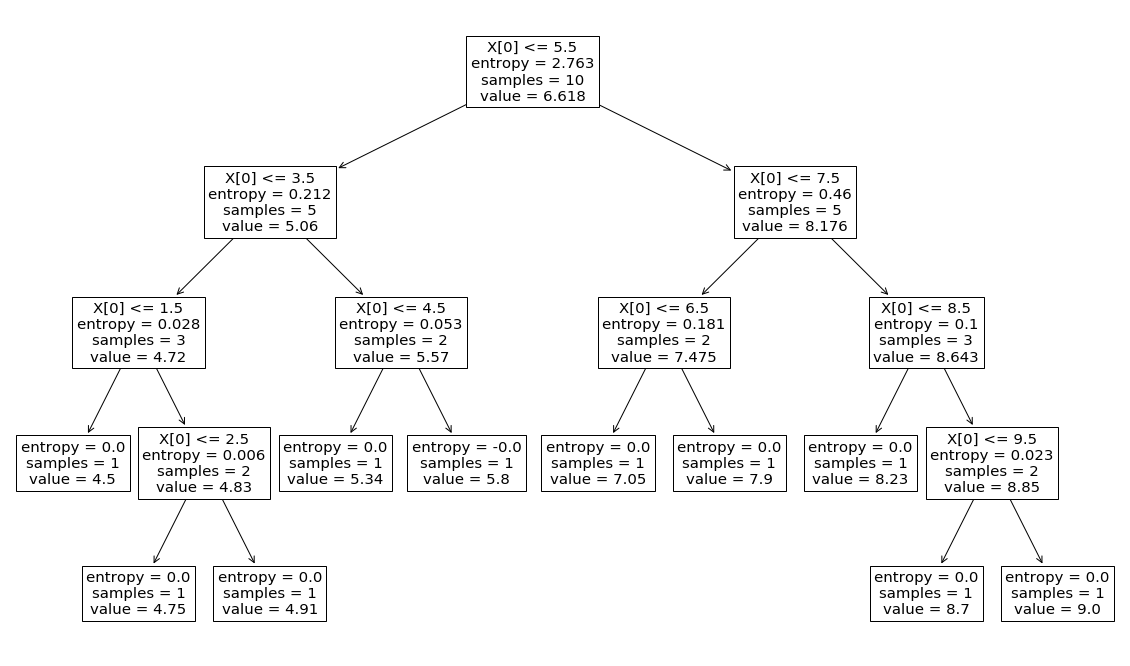

In [49]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error


regr = DecisionTreeRegressor(max_depth=5)
regr.fit(train_X,y)

y_pred_2=regr.predict(test_X)


print('y_predict:{}, square loss:{}'.format(y_pred_2, 
mean_squared_error(test_Y, y_pred_2)))

plt.figure( figsize=(20, 12) )
plot_tree( regr )
plt.show()


In [69]:

'''
Reference：
[1] https://blog.csdn.net/sinat_17196995/article/details/69621687
[2] GitHub: https://github.com/stonycat/ML-in-Action-Code-and-Note
'''
from numpy import *


# 载入数据
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        # python3不适用：fltLine = map(float,curLine) 修改为：
        fltLine = list(map(float, curLine))  # 将每行映射成浮点数，python3返回值改变，所以需要
        dataMat.append(fltLine)
    return dataMat


# 切分数据集为两个子集
def binSplitDataSet(dataSet, feature, value):  # 数据集 待切分特征 特征值
    mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :]
    mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :]
    # 下面原书代码报错 index 0 is out of bounds,使用上面两行代码
    # mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :][0]
    # mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :][0]
    return mat0, mat1


# Tree结点类型：回归树
def regLeaf(dataSet):  # 生成叶结点，在回归树中是目标变量特征的均值
    return mean(dataSet[:, -1])


# 误差计算函数：回归误差
def regErr(dataSet):  # 计算目标的平方误差（均方误差*总样本数）
    return var(dataSet[:, -1]) * shape(dataSet)[0]


# 二元切分
def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(0, 1)):
    # 切分特征的参数阈值，用户初始设置好
    tolS = ops[0]  # 允许的误差下降值
    tolN = ops[1]  # 切分的最小样本数
    # 若所有特征值都相同，停止切分
    if len(set(dataSet[:, -1].T.tolist()[0])) == 1:  # 倒数第一列转化成list 不重复
        return None, leafType(dataSet)  # 如果剩余特征数为1，停止切分1。
        # 找不到好的切分特征，调用regLeaf直接生成叶结点
    m, n = shape(dataSet)
    S = errType(dataSet)  # 最好的特征通过计算平均误差
    bestS = inf
    bestIndex = 0
    bestValue = 0
    for featIndex in range(n - 1):  # 遍历数据的每个属性特征
        # for splitVal in set(dataSet[:,featIndex]): python3报错修改为下面
        for splitVal in set((dataSet[:, featIndex].T.A.tolist())[0]):  # 遍历每个特征里不同的特征值
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)  # 对每个特征进行二元分类
            if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN): continue
            newS = errType(mat0) + errType(mat1)
            if newS < bestS:  # 更新为误差最小的特征
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    # 如果切分后误差效果下降不大，则取消切分，直接创建叶结点
    if (S - bestS) < tolS:
        return None, leafType(dataSet)  # 停止切分2
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    # 判断切分后子集大小，小于最小允许样本数停止切分3
    if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN):
        return None, leafType(dataSet)
    return bestIndex, bestValue  # 返回特征编号和用于切分的特征值


# 构建tree
def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(0, 1)):
    # 数据集默认NumPy Mat 其他可选参数【结点类型：回归树，误差计算函数，ops包含树构建所需的其他元组】
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    if feat == None: return val  # 满足停止条件时返回叶结点值
    # 切分后赋值
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    # 切分后的左右子树
    lSet, rSet = binSplitDataSet(dataSet, feat, val)
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree


def __predict( tree , row ):
    """
    预测 一个样本

    :param row:
    :return:
    """

    p = tree

    while (type(p) == dict) :  # 到达 叶子节点 退出循环
        
#         print('p:',p)

        judge_feature = p['spInd']  # 当前节点划分的 特征
        

        if row[ judge_feature ] <= p['spVal']:
            #p = p['left']
            p = p['right']
            
        else:
            #p = p['right']
            p = p['left']
            

    return p

def predict( tree, testDataArr ):
    """
    推理 测试 数据集，返回预测结果

    :param test_data:
    :return:
    """

    res_list = []

    for row in testDataArr:
        res_list.append( __predict( tree,row ) )

    return np.array( res_list )





'\nReference：\n[1] https://blog.csdn.net/sinat_17196995/article/details/69621687\n[2] GitHub: https://github.com/stonycat/ML-in-Action-Code-and-Note\n'

In [ ]:

myDat = mat (np.concatenate( (train_X , y.reshape(-1,1)),axis=1 ))
CT_dict=createTree(myDat)

print(CT_dict)

# 测试数据集
test_X =  np.array([[4.5, 8.9]]).T
test_Y=  np.array([5.57, 8.85])

print(predict(CT_dict,test_X))


In [71]:
%%time

from sklearn.datasets import load_boston

# 加载sklearn自带的波士顿房价数据集
dataset = load_boston()

# 提取特征数据和目标数据
X = dataset.data # shape: (506, 13)
y = dataset.target

# 将数据集以9:1的比例随机分为训练集和测试集，为了重现随机分配设置随机种子，即random_state参数
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)

regr = DecisionTreeRegressor( max_depth=50 ) # sklearn
regr.fit( X, y )

y_pred_1 = regr.predict( X_test )



Wall time: 11 ms


In [72]:
%%time

myDat = mat (np.concatenate( (X_train , y_train.reshape(-1,1)),axis=1 ))


CT_dict=createTree(myDat)


y_pred_3=predict(CT_dict,X_test)

print( 'by XX , the squared_error:', mean_squared_error(y_test, y_pred_3) )

by XX , the squared_error: 32.296470588235294
Wall time: 3.98 s


In [73]:
%%time

import time 
from sklearn.metrics import mean_squared_error

start = time.time()
print('start create model')

clf = RegresionTree( threshold=0.01 , max_depth=50 )
clf.fit( X_train , y_train )

print(' model complete ')
# 结束时间
end = time.time()
print('time span:', end - start)

y_pred_2= clf.predict( X_test )

print( 'by sklearn , the squared_error:', mean_squared_error(y_test, y_pred_1)) # 8

print( 'by xrh , the squared_error:', mean_squared_error(y_test, y_pred_2) ) # 7 


start create model
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=8.26725 
depth:4 
T.childs:None
T.label:50.0
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>8.26725 
depth:4 
T.childs:None
T.label:50.0
-----------
T.feature:0
T.prev_feature:7,T.prev_feature_split:<=1.3567 
depth:3 
T.childs:{0: <__main__.Node object at 0x000001B3696BE828>, 1: <__main__.Node object at 0x000001B369FD4E80>}
T.label:None
-----------


E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
E:\anaconda\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


T.feature:None
T.prev_feature:5,T.prev_feature_split:<=3.561 
depth:6 
T.childs:None
T.label:27.5
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.17331 
depth:12 
T.childs:None
T.label:21.8
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.17331 
depth:12 
T.childs:None
T.label:22.8
-----------
T.feature:0
T.prev_feature:7,T.prev_feature_split:<=2.3817 
depth:11 
T.childs:{0: <__main__.Node object at 0x000001B363E03A58>, 1: <__main__.Node object at 0x000001B363E039B0>}
T.label:None
-----------
T.feature:None
T.prev_feature:4,T.prev_feature_split:<=0.398 
depth:13 
T.childs:None
T.label:19.4
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.04301 
depth:14 
T.childs:None
T.label:18.2
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.05023 
depth:15 
T.childs:None
T.label:17.1
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.13554 
depth:16 
T.childs:None
T.label:17.4
-----------
T.feature:No

T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.04981 
depth:14 
T.childs:None
T.label:23.4
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.05789 
depth:15 
T.childs:None
T.label:22.0
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.05789 
depth:15 
T.childs:None
T.label:21.7
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:>0.04981 
depth:14 
T.childs:{0: <__main__.Node object at 0x000001B363E142B0>, 1: <__main__.Node object at 0x000001B363E14860>}
T.label:None
-----------
T.feature:0
T.prev_feature:6,T.prev_feature_split:<=21.4 
depth:13 
T.childs:{0: <__main__.Node object at 0x000001B363E146A0>, 1: <__main__.Node object at 0x000001B363E140F0>}
T.label:None
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.08199 
depth:15 
T.childs:None
T.label:21.7
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.08199 
depth:15 
T.childs:None
T.label:22.9
-----------
T.feature:0
T.prev_feature:10,T.p

T.childs:{0: <__main__.Node object at 0x000001B363E11A90>, 1: <__main__.Node object at 0x000001B369832EB8>}
T.label:None
-----------
T.feature:8
T.prev_feature:5,T.prev_feature_split:<=6.416 
depth:13 
T.childs:{0: <__main__.Node object at 0x000001B363E11400>, 1: <__main__.Node object at 0x000001B363E11F28>}
T.label:None
-----------
T.feature:None
T.prev_feature:1,T.prev_feature_split:<=0.0 
depth:14 
T.childs:None
T.label:22.6
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.01096 
depth:15 
T.childs:None
T.label:22.0
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.01096 
depth:15 
T.childs:None
T.label:22.2
-----------
T.feature:0
T.prev_feature:1,T.prev_feature_split:>0.0 
depth:14 
T.childs:{0: <__main__.Node object at 0x000001B369832470>, 1: <__main__.Node object at 0x000001B3698322B0>}
T.label:None
-----------
T.feature:1
T.prev_feature:5,T.prev_feature_split:>6.416 
depth:13 
T.childs:{0: <__main__.Node object at 0x000001B369832A90>, 1: <_

T.feature:None
T.prev_feature:2,T.prev_feature_split:>18.1 
depth:13 
T.childs:None
T.label:19.6
-----------
T.feature:2
T.prev_feature:6,T.prev_feature_split:<=97.7 
depth:12 
T.childs:{0: <__main__.Node object at 0x000001B36983BF28>, 1: <__main__.Node object at 0x000001B36983B978>}
T.label:None
-----------
T.feature:None
T.prev_feature:6,T.prev_feature_split:>97.7 
depth:12 
T.childs:None
T.label:19.2
-----------
T.feature:6
T.prev_feature:2,T.prev_feature_split:>8.14 
depth:11 
T.childs:{0: <__main__.Node object at 0x000001B36983BA58>, 1: <__main__.Node object at 0x000001B36983BE80>}
T.label:None
-----------
T.feature:2
T.prev_feature:6,T.prev_feature_split:>91.0 
depth:10 
T.childs:{0: <__main__.Node object at 0x000001B369214B38>, 1: <__main__.Node object at 0x000001B36983BEB8>}
T.label:None
-----------
T.feature:6
T.prev_feature:12,T.prev_feature_split:>11.34 
depth:9 
T.childs:{0: <__main__.Node object at 0x000001B369691978>, 1: <__main__.Node object at 0x000001B369214A90>}
T.lab

T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.09378 
depth:9 
T.childs:None
T.label:21.7
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.09378 
depth:9 
T.childs:None
T.label:23.1
-----------
T.feature:0
T.prev_feature:6,T.prev_feature_split:<=39.0 
depth:8 
T.childs:{0: <__main__.Node object at 0x000001B3691D2588>, 1: <__main__.Node object at 0x000001B3691D2278>}
T.label:None
-----------
T.feature:None
T.prev_feature:12,T.prev_feature_split:<=14.69 
depth:9 
T.childs:None
T.label:23.1
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.13058 
depth:13 
T.childs:None
T.label:20.4
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.21977 
depth:14 
T.childs:None
T.label:19.4
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.21977 
depth:14 
T.childs:None
T.label:19.75
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:>0.13058 
depth:13 
T.childs:{0: <__main__.Node object at 0x000001B363E00CC0>

T.childs:None
T.label:16.5
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:<=0.21124 
depth:9 
T.childs:{0: <__main__.Node object at 0x000001B36983BB00>, 1: <__main__.Node object at 0x000001B36983BA20>}
T.label:None
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.22489 
depth:12 
T.childs:None
T.label:15.0
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.22489 
depth:12 
T.childs:None
T.label:14.45
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:<=0.98843 
depth:11 
T.childs:{0: <__main__.Node object at 0x000001B36983B2B0>, 1: <__main__.Node object at 0x000001B36983BEF0>}
T.label:None
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=1.13081 
depth:13 
T.childs:None
T.label:12.7
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>1.13081 
depth:13 
T.childs:None
T.label:13.1
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:<=1.15172 
depth:12 
T.childs:{0: <__main__.Node obje

T.childs:None
T.label:9.7
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:>7.36711 
depth:11 
T.childs:{0: <__main__.Node object at 0x000001B3692250B8>, 1: <__main__.Node object at 0x000001B3692250F0>}
T.label:None
-----------
T.feature:0
T.prev_feature:6,T.prev_feature_split:<=97.0 
depth:10 
T.childs:{0: <__main__.Node object at 0x000001B369225470>, 1: <__main__.Node object at 0x000001B369225B00>}
T.label:None
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=7.99248 
depth:11 
T.childs:None
T.label:12.3
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=8.15174 
depth:13 
T.childs:None
T.label:11.5
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>8.15174 
depth:13 
T.childs:None
T.label:11.3
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:<=9.18702 
depth:12 
T.childs:{0: <__main__.Node object at 0x000001B369225320>, 1: <__main__.Node object at 0x000001B369225390>}
T.label:None
-----------
T.feature:None
T

T.feature:0
T.prev_feature:1,T.prev_feature_split:>0.0 
depth:13 
T.childs:{0: <__main__.Node object at 0x000001B36921B748>, 1: <__main__.Node object at 0x000001B36921B4A8>}
T.label:None
-----------
T.feature:1
T.prev_feature:2,T.prev_feature_split:<=6.09 
depth:12 
T.childs:{0: <__main__.Node object at 0x000001B36921B710>, 1: <__main__.Node object at 0x000001B36921B4E0>}
T.label:None
-----------
T.feature:None
T.prev_feature:2,T.prev_feature_split:>6.09 
depth:12 
T.childs:None
T.label:34.7
-----------
T.feature:2
T.prev_feature:11,T.prev_feature_split:<=394.63 
depth:11 
T.childs:{0: <__main__.Node object at 0x000001B36921B550>, 1: <__main__.Node object at 0x000001B36921B780>}
T.label:None
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:<=0.01311 
depth:13 
T.childs:None
T.label:35.4
-----------
T.feature:None
T.prev_feature:0,T.prev_feature_split:>0.01311 
depth:13 
T.childs:None
T.label:34.9
-----------
T.feature:0
T.prev_feature:0,T.prev_feature_split:<=0.03359 
d